<a href="https://colab.research.google.com/github/larissafeitosa24/MVP_Projeto2_PUC_Rio_v2/blob/main/c_pia_de_modelo_a_es_google_rede_neural_recorrente_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modelo de Rede Neural Recorrente
A base se trata de dados de ações do Google, com data base de 2012 a 2017
Separados em duas bases, base de treino e teste( a base de teste tem 20 dias)

- A base utilizada foi extraída do yahoo finanças para as ações da Google

Campos do dataset :

1.   Date
2.   Open - Valor de Abertura
3.   High - Valor mais alto do dia
4.   Low - Valor mais baixo
5.   Volume - Volume Negociado
6.   High - Close : Valor de Fechamento


Objetivo - Usar os dados de treino para prever os valores que estão nos dados de teste, o objetivo é comparar a previsão do modelo com o que de fato aconteceu.# Nova seção





In [ ]:
# Importar as bibliotecas
import numpy as np # vai ser usado pra criar os arrays
import matplotlib.pyplot as plt # para gerar graficos
import pandas as pd

In [ ]:
#importar os dados
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values # separar apenas os atributos
# que usaremos no modelo

In [ ]:
#Transformação
from sklearn.preprocessing import MinMaxScaler # criar valores numa mesma escala
sc = MinMaxScaler(feature_range = (0, 1)) # a normalização será entre 0 e 1
training_set_scaled = sc.fit_transform(training_set) # aplicar os dados na normalização

In [ ]:
#Estruturas de dados com 60 intervalos de tempo, vamos pegar
# sempre 60 dias pra prever a proxima saida
X_train = [] # cria lista do python pra pegar os 60 dias
y_train = [] # essa lista preve o proximo dia
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
# Colocar os dados no formatos que o Keras exige, ele precisa estar em três dimensões
# bacth_size, timesteps( intervalos de treinamento, e numero de indicadores que serão usados)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
#Importando bibliotecas do Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
#Inicializar a rede neural
regressor = Sequential()
#Criando as camadas
#1
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
#2
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#3
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#4
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# camda de saída
regressor.add(Dense(units = 1))

In [ ]:
#Compilando a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#Treinando
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 15s 138ms/step - loss: 0.0416
Epoch 2/100
38/38 [==============================] - 6s 153ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0048
Epoch 4/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0048
Epoch 5/100
38/38 [==============================] - 5s 136ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0048
Epoch 7/100
38/38 [==============================] - 5s 139ms/step - loss: 0.0042
Epoch 8/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0048
Epoch 9/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0049
Epoch 10/100
38/38 [==============================] - 6s 156ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 5s 135ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0035
Epoch 13/100

In [ ]:
#Obtendo os dados reais
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values # pegar apenas coluna de saída, a Open

In [ ]:
#Obtendo os dados previstos
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1) # transformar a variável passando -1 e 1 como parâmetro
inputs = sc.transform(inputs) # fazer a normalização
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


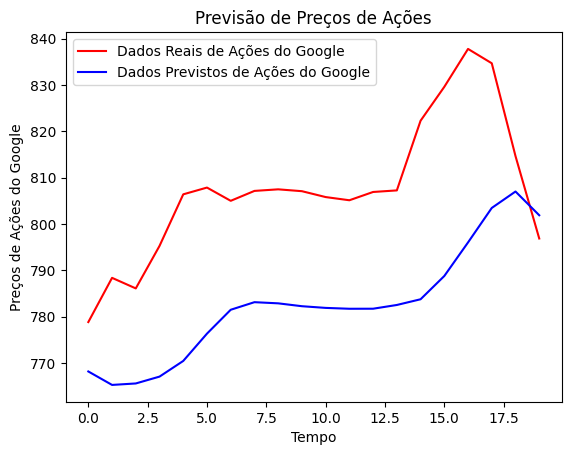

In [ ]:
#Visualizando os Resultados
plt.plot(real_stock_price, color = 'red', label = 'Dados Reais de Ações do Google')
plt.plot(predicted_stock_price, color = 'blue', label = 'Dados Previstos de Ações do Google')
plt.title('Previsão de Preços de Ações')
plt.xlabel('Tempo')
plt.ylabel('Preços de Ações do Google')
plt.legend()
plt.show()

É Possível verificar que seguiu uma tendência boa, mas ali pro final não conseguiu acertar tudo, teve um grande pico, prever dados financeiros é bastante complexa, não é recomendado basear os investimentos em modelos como esse, mas pra fornecer visões de tendência é um bom parâmetro.